# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag (This is your target variable!)
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

In [115]:
import numpy as np
from scipy.io import arff
import sklearn as sk
from sklearn import tree
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
import scipy.stats as stat

## 0. Read data, visualize, basic statistics, understand it

In [116]:
data = pd.read_csv('churn-prediction.csv')


## 1. Data preprocessing, normalization, missing data, categorical data

In [117]:
credit_limit = data['Credit_Limit']
#credit_limit_bins = pd.Series(pd.cut(credit_limit, bins= 10)).value_counts().reset_index()
#credit_limit_bins

In [118]:
credit_limit.describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

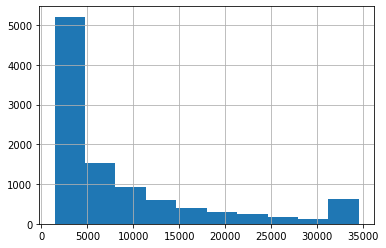

In [119]:
credit_limit.hist()

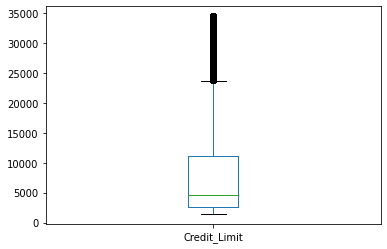

In [120]:
credit_limit.plot(kind='box')

In [121]:
from scipy.stats import skew
skew(credit_limit)

1.6664789242587705

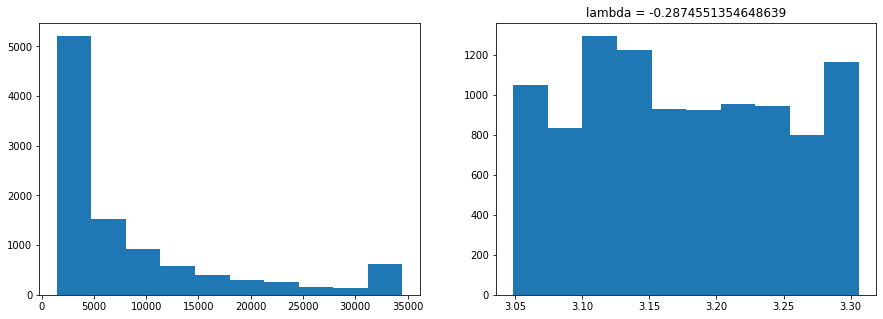

In [146]:
credit_limit_transformed = stat.boxcox(credit_limit)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data['Credit_Limit'])

plt.subplot(1,2,2)
plt.hist(credit_limit_transformed[0])
plt.title(f'lambda = {credit_limit_transformed[1]}')
plt.show()

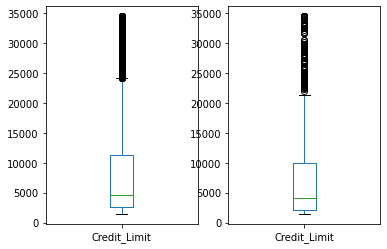

In [123]:
plt.figure()
plt.subplot(1,2,1)
data['Credit_Limit'].loc[data['Attrition_Flag']=='Existing Customer'].plot.box()
plt.subplot(1,2,2)
data['Credit_Limit'].loc[data['Attrition_Flag']=='Attrited Customer'].plot.box()
plt.show()


In [124]:
credit_limit = data['Credit_Limit']
credit_limit_df = pd.DataFrame(credit_limit)

Q1 = np.percentile(credit_limit_df,25)
Q3 = np.percentile(credit_limit_df,75)
IQR = Q3-Q1

𝐿=𝑄1-1.5*𝐼𝑄𝑅
𝑈=𝑄3+1.5*𝐼𝑄𝑅

credit_limit_df['Outlier'] = (credit_limit_df < L )| (credit_limit_df > U)
outliers = credit_limit_df['Outlier'].loc[credit_limit_df['Outlier']==True]
# printing outliers
print(outliers)

#rang
print('outliers range', outliers.min(), outliers.max())

# counnting outliers
print('N of outliers', credit_limit_df.loc[credit_limit_df['Outlier']==True].count())

6        True
7        True
16       True
40       True
45       True
         ... 
10098    True
10100    True
10104    True
10110    True
10112    True
Name: Outlier, Length: 984, dtype: bool
outliers range True True
N of outliers Credit_Limit    984
Outlier         984
dtype: int64


In [139]:
# Avg_Open_To_Buy_EDA - higly correlated to Credit_Limit so we probbaly won't use it

In [140]:
Avg_Open_To_Buy = data['Avg_Open_To_Buy']

In [141]:
Avg_Open_To_Buy.describe()

count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64

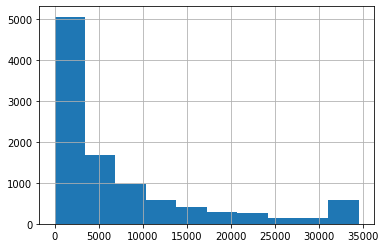

In [142]:
Avg_Open_To_Buy.hist()

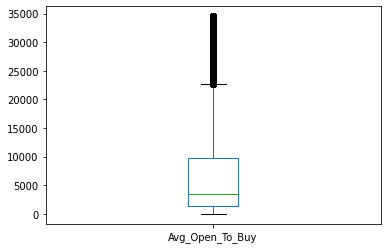

In [143]:
Avg_Open_To_Buy.plot(kind='box')

In [144]:
skew(Avg_Open_To_Buy)

1.6614504071556497

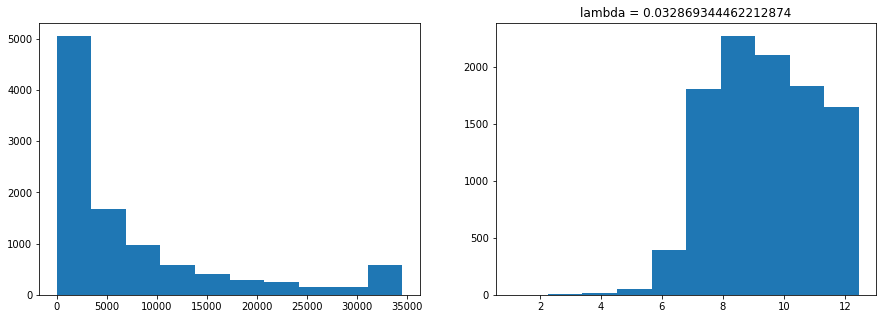

In [145]:
Avg_Open_To_Buy_transformed = stat.boxcox(Avg_Open_To_Buy)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data['Avg_Open_To_Buy'])

plt.subplot(1,2,2)
plt.hist(Avg_Open_To_Buy_transformed[0])
plt.title(f'lambda = {Avg_Open_To_Buy_transformed[1]}')
plt.show()

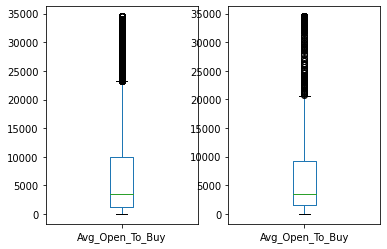

In [147]:
plt.figure()
plt.subplot(1,2,1)
data['Avg_Open_To_Buy'].loc[data['Attrition_Flag']=='Existing Customer'].plot.box()
plt.subplot(1,2,2)
data['Avg_Open_To_Buy'].loc[data['Attrition_Flag']=='Attrited Customer'].plot.box()
plt.show()

In [125]:
# Total_Revolving_Balance_EDA

In [126]:
Total_Revolving_Bal = data['Total_Revolving_Bal']

In [127]:
Total_Revolving_Bal.describe()

count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

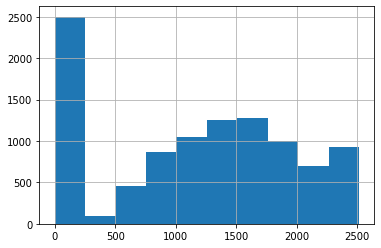

In [128]:
Total_Revolving_Bal.hist()

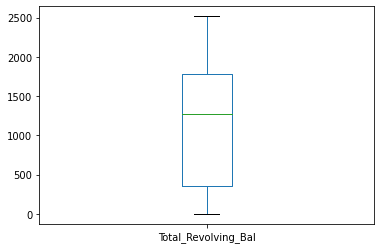

In [129]:
Total_Revolving_Bal.plot(kind='box')

In [130]:
skew(Total_Revolving_Bal)

-0.14881520376464566

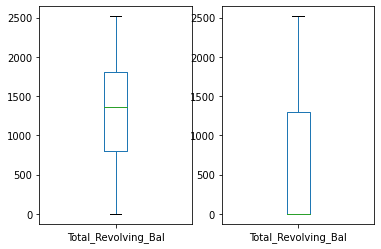

In [131]:
plt.figure()
plt.subplot(1,2,1)
data['Total_Revolving_Bal'].loc[data['Attrition_Flag']=='Existing Customer'].plot.box()
plt.subplot(1,2,2)
data['Total_Revolving_Bal'].loc[data['Attrition_Flag']=='Attrited Customer'].plot.box()
plt.show()

In [132]:
# Total_Amt_Chng_Q4_Q1_EDA

In [133]:
Total_Amt_Chng_Q4_Q1 = data['Total_Amt_Chng_Q4_Q1']

In [134]:
Total_Amt_Chng_Q4_Q1.describe()

count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

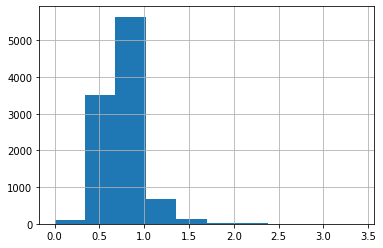

In [135]:
Total_Amt_Chng_Q4_Q1.hist()

In [136]:
skew(Total_Amt_Chng_Q4_Q1)

1.7318068495622143

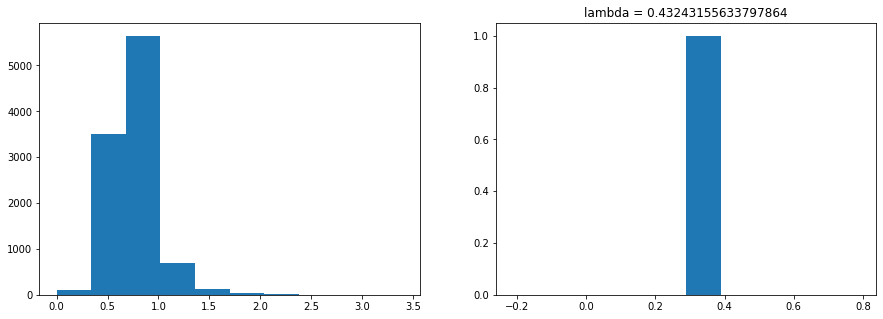

In [137]:
import math
Total_Amt_Chng_Q4_Q1_transformed = []
for i in Total_Amt_Chng_Q4_Q1:
  if i > 0:
    Total_Amt_Chng_Q4_Q1_transformed.append(math.log(i))
  if i == 0:
    i = 0.01
    Total_Amt_Chng_Q4_Q1_transformed.append(math.log(i))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df['Total_Amt_Chng_Q4_Q1'])

plt.subplot(1,2,2)
plt.hist(Total_Amt_Chng_Q4_Q1_transformed[0])
plt.title(f'lambda = {Total_Amt_Chng_Q4_Q1_transformed[1]}')
plt.show()

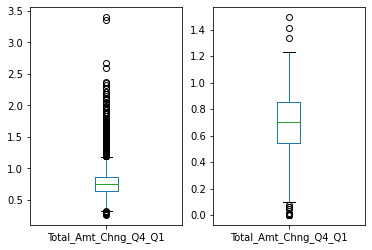

In [138]:
plt.figure()
plt.subplot(1,2,1)
data['Total_Amt_Chng_Q4_Q1'].loc[data['Attrition_Flag']=='Existing Customer'].plot.box()
plt.subplot(1,2,2)
data['Total_Amt_Chng_Q4_Q1'].loc[data['Attrition_Flag']=='Attrited Customer'].plot.box()
plt.show()

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect